# Exercise 3 - Error Modelling

## 1. Introduction

In this exercise you will be provided with reference
soil moisture data in order to perform a quantitative validation of the model output and further adjust the
calibration parameters to minimize model errors.

Very crucial to understand is that there is not one single number that can describe the quality of a data
set. A large variety of performance criteria with sometimes redundant, and sometimes complementary
information are available. The choice of the used criteria depends on the application for which the data
should be used. For soil moisture data the main quality requirements are (i) how well the data is able to
capture temporal fluctuations in soil moisture, and (ii) how well absolute soil moisture measurements can
be captured.

The reference data sets against which you will compare your model output are obtained from an in situ sensor and from a land surface model. In situ measurements are usually considered as the best representation
for the ”true” soil moisture state, because they can be easily calibrated in a controlled laboratory experiment or in the field, and their exact accuracy can thus be easily determined and improved.
<br> However, in situ sensors sample only a few cubic centimeters of the soil and are therefore also referred to as point-scale measurements. When used to validate satellite measurements, the large difference in the spatial resolution
will consequently introduce scaling errors which are not easy to separate from actual sensor- or retrieval
errors.
<br> Soil moisture data from land surface models, on the other hand, are available globally at spatial
scales comparable to those from satellite measurements. Land surface models are so called ”data assimilation” frameworks, in which land surface processes, such as the hydrological cycle and its dynamics, are
modelled on a particular scale within a big adjustment framework that uses a large variety of input data
sources at different scales and with different coverage (e.g., precipitation gauges or temperature sensors,
but also satellite observations).
<br> The big amount and heterogeneity of the used input data sources allow
usually a significantly improved accuracy of the model estimates compared to the single input products,
but the exact quantification of the achieved quality is difficult. However, the great advantage when using
it as a reference to validate satellite observations is their similarity in spatial resolution, what reduces the
risk of artificially introduced scaling errors.

## 2. Datasets

### 2.1 Backscatter data

The backscatter data that is used for retrieving soil moisture is the same as in exercise 2, i.e., acquired from MetOp ASCAT. It covers the year 2009 and is located at an agricultural site in the central US.
Remember that the spatial resolution of this pixel is approximately 25 ∗ 25 km.

### 2.2 In situ measurements

The in situ data that was provided to you in the last exercise for a first visual comparison will now be provided as quantitative reference for validating the satellite retrievals and adjusting the model parameters.
Measurements are available until mid of October 2009, so the months November and December have to
be excluded from the validation.

### 2.3 Land surface model data

The land surface model that you will use is the Global Land Data Assimilation (GLDAS-) Noah model.
It provides soil moisture values globally every 3 hours on a quarter degree grid, which corresponds to
approximately 28 ∗ 28 km.

## 3. Retrieval method

The retrieval method that you will use is the same as in the last exercise, i.e., a non-linear optimization, in
which the sum of the squared differences between modelled and observed backscatter is minimized.
<br><br>
$$min\;\sum_{i=1}^N{[\sigma^0_{modelled,i}(f,\theta,\Theta_V,V,ks,S,C,T,\Theta_S)\;-\;\sigma^0_{observed,i}]^2}$$
<br>
In this exercise you should use the experience about the behaviour of the calibration parameters that you
have gained in the last exercise, and complement it with the insights that you gain through the quantitative
validation criteria.

## 4. Validation

As mentioned before, differences in the spatial resolution of the respective data sets can lead to significant
scaling errors. These errors are partly of a systematic nature and can thus be minimized when using
appropriate rescaling techniques. A detailed introduction to scaling will be given in the lecture. In the
following, only a short description of the scaling methods that you can use will be given before introducing
the actual validation metrics.

### 4.1 Rescaling methods

Consider two data sets X and Y that are related to a common "true" soil moisture state Θ in the following
way:
<br><br>
$$X\;=\;\alpha_X\;+\;\beta_X\Theta\;+\;\varepsilon_X$$
$$Y\;=\;\alpha_Y\;+\;\beta_Y\Theta\;+\;\varepsilon_Y$$
<br><br>
$\Theta$ is the true soil moisture state, and $\alpha_i$ and $\beta_i$ are systematic errors in the respective data set $i$ with respect to this "truth". Systematic scaling differences between the data sets are reflected in differences
between $\alpha_X$ and $\alpha_Y$, and between $\beta_X$ and $\beta_Y$, respectively. The terms $\varepsilon_i$ denote random measurement errors (also including random scaling errors!) that shall be estimated in the validation and minimized in the subsequently following calibration iteration. This iterative process is referred to as "Cal/Val activity".
Systematic differences between the data sets can be removed by rescaling one data set to the other, e.g.,
data set Y against data set X (denoted as the superscript in the following). You will be able to choose
between the following rescaling techniques.

**Minimum-maximum fit**
<br><br>
This method scales the datasets so that they have the same minimum and maximum value:
<br><br>
$$Y^X\;=\;\frac{Y\;-\;min(Y)}{max(Y)\;-\;min(Y)}\;\cdot\;[max(X)-min(X)]\;+\;min(X)$$
<br><br>
**Mean-standard deviation fit**
<br><br>
This method scales the datasets so that they have the same mean value and standard deviation:
<br><br>
$$Y^X\;=\;\frac{Y\;-\;\bar{Y}}{\sigma_Y}\;\cdot\;\sigma_X\;+\;\bar{X}$$
<br><br>
**Linear regression**
<br><br>
This method scales one dataset to the other in a linear way:
<br><br>
$$Y\;=\;a\;+\;bX$$<br>
$$Y^X\;=\;\frac{X}{b}\;-\;\frac{a}{b}$$
<br><br>
The coefficients $a$ and $b$ are derived empirically in a least-squares fashion.
<br><br>
**CDF-Matching**
<br><br>
This method scales one data set to the other in a non-linear fashion by matching their cumulative distribution function (CDF). This is done by sorting the data, splitting it into percentiles, and then rescaling
the percentiles through a linear regression:
<img src="cdf.jpg" alt="Illustration of the CDF matching technique" style="width: 200px;"/>

### 4.2 Validation metrics

Six different quality criteria with complementary information content will be available to you:
<br><br>
**Pearson correlation coefficient**
<br><br>
The Pearson correlation coefficient is a measure for first-order statistical dependency between two data
sets, expressed through their standard deviations and covariance:
<br><br>
$$R\;=\;\frac{\sigma_{XY}}{\sigma_X\sigma_Y}$$
<br><br>
$\sigma_{XY}$ is the covariance between $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are their standard deviations, respectively.
<br><br>
**Spearman correlation coefficient**
<br><br>
The Spearman correlation coefficient is a measure for higher-order statistical dependency between two
data sets, expressed through the standard deviations and covariance of and between their ranks:
<br><br>
$$\rho\;=\;\frac{\sigma_{r_{XY}}}{\sigma_{r_X}\sigma_{r_Y}}$$
<br><br>
$\sigma_{r_{XY}}$ is the covariance between the ranks $X$ and $Y$, and $\sigma_{r_X}$ and $\sigma_{r_Y}$ are their standard deviations, respectively. The rank is the sort order index of the measurements when sorted after ascending values. If two random variables are only linearly related, the Spearman correlation coefficient is identical to the Pearson correlation coefficient.
<br><br>
**Bias**
<br><br>
The bias is a measure for additive systematic differences between two data sets, calculated as the difference
in mean values:
<br><br>
$$b\;=\;\bar{X}\;-\;\bar{Y}$$
<br><br>
**Standard deviation ratio**
<br><br>
The standard deviation ratio is a measure for multiplicative systematic differences between two data sets:
<br><br>
$$SDR_{XY}\;=\;\frac{\sigma_X}{\sigma_Y}$$
<br><br>
**Root-Mean-Square-Difference (RMSD)**
<br><br>
The Root-Mean-Square-Difference (RMSD) is a measure for total deviations (i.e., containing both sys-
tematic differences and random errors) between and in the data sets):
<br><br>
$$RMSD_X\;=\;\langle(X\;-\;Y)^2\rangle$$
<br><br>
The Gauss brackets $\langle...\rangle$ denote the temporal average. When calculated after a rescaling has been applied,
this metric is also referred to as unbiased Root-Mean-Square-Difference (ubRMSD) since, as the name
suggests, biases have been corrected through the rescaling. The ubRMSD is expected to be a measure for
random errors in one data set, assuming the other to be of much higher precision.
<br><br>
**Triple collocation**
<br><br>
Obviously, the ubRMSD can only act as a measure for random errors if one of the data sets, which is
supposed to act as reference, does not contain significant errors itself, and if the spatial scale is comparable
in order to avoid additional scaling errors. The triple collocation (TC) method is an alternative technique,
that requires three data sets, but provides error estimates for each of them individually, independent of
the quality of the others:
<br><br>
$$TC_X^X\;=\;\langle(X^X\;-\;Y^X)\cdot(X^X\;-\;Z^X)\rangle$$
$$TC_Y^X\;=\;\langle(Y^X\;-\;X^X)\cdot(Y^X\;-\;Z^X)\rangle$$
$$TC_Z^X\;=\;\langle(Z^X\;-\;X^X)\cdot(Z^X\;-\;Y^X)\rangle$$
<br><br>
$TC_i^X$ denotes the error estimate for data set $i$ with $i\;\epsilon\;[X,Y,Z]$. In the TC, an a-priori rescaling is mandatory even though the choice of which data set is used as scaling reference can be made arbitrary. The scaling
reference in the equations above is again indicated with the superscript. Note that also the error estimates are expressed in the data space of the chosen scaling reference.
<br><br>

## 5. Description of the study area

You will use data from the same ASCAT pixel and the same in situ station that you have used in the last
exercise. In addition, GLDAS-Noah data is provided:
<br><br>
<img src="studyarea.jpg" alt="Aerial image of the used ASCAT pixel" style="width: 700px;"/>
<br><br>
The yellow cross marks the pixel center, the yellow box the grid box extent (25 km x 25 km). The blue box marks the pixel of the closest GLDAS-Noah gridpoint (28 km x 28 km) and the white circle marks the contained in situ monitoring station.

## 6. Source code description

The following parameters can be set:
* sand, clay: Sand and clay content [%] (0-1)
* temp: Temperature [°C]
* s_vol: Stem volume $[\frac{m^3}{ha}]$
* f_rms: Surface roughness $[\frac{s}{\lambda}]$ [-] 
* m_soil_x0: Initial value for soil moisture $[\frac{m^3m^{-3}}{m^3m^{-3}}]$ (0-0.6)
* m_veg_x0: Initial value for vegetation water content $[\frac{m^3m^{-3}}{m^3m^{-3}}]$ (0-1)
<br><br>

Sand, clay, temperature, stem volume, and surface roughness are the static parameters that must be passed,
the x0 values for soil moisture and vegetation water content are the initial values to start the optimization.
These parameters are mandatory.

You can chose between the following rescaling methods:
* 'min_max': Minimum-Maximum fit
* 'mean_std': Mean-Standard deviation fit
* 'linreg': Linear regression
* 'lin_cdf_match': Cumulative Distribution Function (CDF-) matching
* None: no rescaling will be applied

The passing of the rescaling method is optional. If not provided, or provided as an empty variable (None),
no rescaling will be applied.
Additionally, the time span (only within 2009!) and the value range of the y-axis that shall be used in
the plots can be optionally passed. If this is not done, the entire year 2009 and the minimum and maximum values of soil moisture will be used as axes limits.

<br><br>
Example:
<pre><code>
parameters = {'sand': 0.36, 'clay': 0.23, 'temp': 20,
              's_vol': 300, 'f_rms': 0.2,
              'm_veg_x0': 0.5, 'm_soil_x0': 0.01 },
ue.validate(parameters,
            rescaling = None,
            timespan = ['2009-01', '2009-10'])
</code></pre>

## 7. Code

Like in the last exercise, you will be able to apply the inverse model with a self chosen set of calibration
parameters. The resulting soil moisture estimates will be shown in a time series and in a scatter matrix
in comparison to the above described two reference data sets. In addition the above described validation
metrics are calculated after a rescaling technique has been applied which you can choose on your own.

In [1]:
%matplotlib inline

In [2]:
import validation as ue

In [3]:
parameters = {'sand': 0.36, 'clay': 0.23, 'temp': 20,
            's_vol': 300, 'f_rms': 0.2,
            'm_veg_x0': 0.5, 'm_soil_x0': 0.01 }

# After changing the parameters, hit Shift+Enter to store the new values

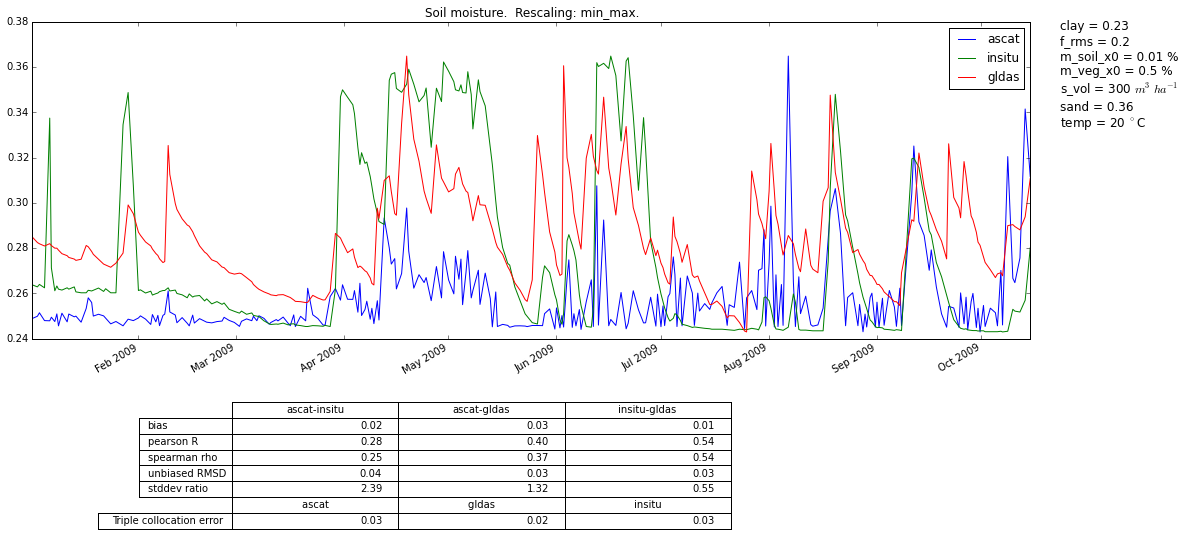

/home/ipfeil/miniconda/envs/sci-sm-tutorials_test/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


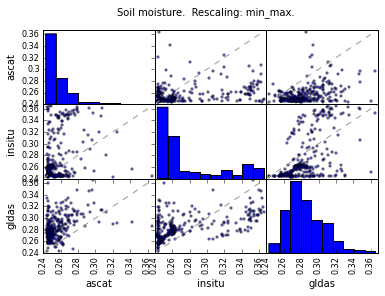

In [4]:
# Then run this code by hitting Shift+Enter
# If an error appears, try to run the above code again
# (Running the code may take a few seconds. If a warning (highlighted in red) occurs, you can just ignore it.)
ue.validate(parameters, rescaling='min_max', timespan = ['2009-01', '2009-10'])

## 8. Analysis

Try to answer the following questions:
<br><br>
1. How do the performance metrics change when using different rescaling methods? Are there some
metrics that are more affected than others? What is in your opinion the best rescaling technique?
<br><br>
2. Try to minimize the model errors by changing the calibration parameters. Are all performance metrics affected by the model parameters in the same way? What is the best result that you can achieve
in terms of the provided error metrics? Are the therefore used model parameters in a physically
meaningful range?
<br><br>
3. What is the best result that you can achieve when sticking to physically meaningful value ranges?
Can these results be worse than for physically meaningless values? If yes, do you have an idea why?
<br><br>
4. Is it possible that by changing the model parameters some performance criteria improve while others get worse? If yes, can you explain why?
<br><br>

**Hint:** Use your knowledge about the behaviour of the model w.r.t. changes in the calibration parameters
that you have gained in the last exercise, and start your analysis from the thereby visually obtained ”best”
parameter set.